# DATASET - Alquileres AIRBNB en Europa

**Descripción:**
Departamentos en alquiler en AIRBNB en Europa, en función de tipo de las características del local.

**Variables de interés:**
Ciudad, Precio, Tipo, Capacidad, Distancias a puntos de interés, Distancias al metro

**Fuente:** 
https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset

**Objetivo:**
Generar hipótesis de interés sobre el dataset, crear visualizaciones e interpretar los resultados obtenidos.

## ABSTRACT

Partiendo del dataset de locales en alquiler en distintas ciudades de Europa nuestro objetivo será obtener un modelo que nos permita calcular el precio en función de otras variables disponibles.

Para lograr nuestro objetivo, importaremos los datos y los adecuaremos para poder trabajar con ellos a través de las distintas herramientas que vimos en el curso.

Como primera medida, realizaremos una matriz de correlación entre todas las variables, para determinar cuáles variables independientes correlación mejor con la variaable dependiente precio.

Una vez definidas las variables elegidas, graficaremos el precio en función de cada una de ellas, para observar en forma gráfica y lo más intuitiva posible, si existe una correlación directa entre las variables escogidas y el precio de alquiler. El tipo de gráfico elegido deberá ser el más adecuado para cada caso, teniendo en cuenta si la variable es numérica o categórica y si corresponde univariado o multivariado para una mejor visualización. Usaremos gráficos tipo boxplot sin tener en cuenta los outliers y gráficos tipo scatterplot discriminado por ciudad.

Para corrorobar que las observaciones realizadas a través de gráficos correspondan a relaciones verificables, obtendremos los coeficientes y los p-valores de cada variable dependiente con respecto al precio, empleando las librerías correspondientes, como ser pingouin y statsmodels.
Luego, repetiremos los cálculos anteriores pero para una ciudad en particular, lo que nos permitirá apreciar si el modelo permite ajustarse mejor a una ciudad o al conjunto de ciudades europeas incluidas en el dataset.

Por último, generaremos un modelo para calcular el precio de alquiler en función de las variables independientes escogidas. 
Como conclusión podemos ver que obtuvimos un modelo que tiene p-valores aceptables ya que son menores a 0.05, pero el r2 solo permite expllicar el 34% de la variación de los precios, lo que es un valor muy bajo.

## DESARROLLO


En primer lugar importaremos los datos desde nuestro repositorio de github y reemplazaremos los nombres de las columnas para eliminar espacios blancos, buscando evitar problemas en el código futuro.

In [1]:
import pandas as pd
import requests
from io import StringIO

url = 'https://raw.githubusercontent.com/tekluis/CoderHouse/main/Aemf.csv'
response = requests.get(url).text
csv_data = StringIO(response)

df = pd.read_csv(csv_data)

df = df.drop('Normalised Attraction Index', axis=1)
df = df.drop('Normalised Restraunt Index', axis=1)

nombres_nuevos = {
    'Room Type': 'Room_Type',
    'Shared Room': 'Shared_Room',
    'Private Room': 'Private_Room',
    'Person Capacity': 'Person_Capacity',
    'Multiple Rooms': 'Multiple_Rooms',
    'Cleanliness Rating': 'Cleanliness_Rating',
    'Guest Satisfaction': 'Guest_Satisfaction',
    'City Center (km)': 'City_Center',
    'Metro Distance (km)': 'Metro_Distance',
    'Attraction Index': 'Attraction_Index',
    'Restraunt Index': 'Restraunt_Index'
}

df = df.rename(columns=nombres_nuevos)

df['Attraction_Index'] = df['Attraction_Index']/1000
df['Restraunt_Index'] = df['Restraunt_Index']/1000

print("Cantidad de filas:", df.shape[0])
print("Cantidad de columnas:", df.shape[1])
df

Cantidad de filas: 41714
Cantidad de columnas: 17


,City,Price,Day,Room_Type,Shared_Room,Private_Room,Person_Capacity,Superhost,Multiple_Rooms,Business,Cleanliness_Rating,Guest_Satisfaction,Bedrooms,City_Center,Metro_Distance,Attraction_Index,Restraunt_Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,0.078690,0.098254
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,0.631176,0.837281
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,0.075276,0.095387
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,0.493273,0.875033
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,0.552830,0.815306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6,False,0,1,10,100,3,0.530181,0.135447,0.219402,0.438757
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2,False,0,0,8,86,1,0.810205,0.100839,0.204970,0.342183
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2,False,0,0,10,93,1,0.994051,0.202539,0.169073,0.282296
41712,Vienna,301.054157,Weekend,Private room,False,True,2,False,0,0,10,87,1,3.044100,0.287435,0.109237,0.158563


Para elegir las variables independientes sobre las que realizaremos el análisis, usaremos una matriz de correlación.

In [2]:
correlation_matrix = df.corr()
correlation_matrix

/var/folders/6b/nxxkks4j4t5815ftmyvm6xgh0000gn/T/ipykernel_6480/868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Price,Shared_Room,Private_Room,Person_Capacity,Superhost,Multiple_Rooms,Business,Cleanliness_Rating,Guest_Satisfaction,Bedrooms,City_Center,Metro_Distance,Attraction_Index,Restraunt_Index
Price,1.000000,-0.038231,-0.149694,0.179969,-0.040391,-0.055322,0.014206,0.003987,0.016069,0.206687,-0.052462,-0.038989,0.168785,0.113171
Shared_Room,-0.038231,1.000000,-0.059227,0.042136,-0.032852,-0.018975,0.057259,-0.049365,-0.035134,-0.022719,0.020506,-0.016123,-0.034541,-0.033135
Private_Room,-0.149694,-0.059227,1.000000,-0.475804,-0.056006,0.146854,-0.022433,-0.026518,-0.052664,-0.142468,0.133191,0.032350,0.003532,0.006598
Person_Capacity,0.179969,0.042136,-0.475804,1.000000,0.036633,-0.058319,0.099836,0.010089,0.017348,0.559161,-0.077547,0.008423,0.013310,0.021888
Superhost,-0.040391,-0.032852,-0.056006,0.036633,1.000000,0.087061,-0.091925,0.279584,0.292312,0.023717,-0.024647,0.014925,-0.022746,-0.033509
Multiple_Rooms,-0.055322,-0.018975,0.146854,-0.058319,0.087061,1.000000,-0.465811,0.033897,0.040208,-0.005096,0.032846,0.035222,0.022380,0.024141
Business,0.014206,0.057259,-0.022433,0.099836,-0.091925,-0.465811,1.000000,-0.076511,-0.178954,-0.022079,-0.181273,-0.066284,0.087144,0.113270
Cleanliness_Rating,0.003987,-0.049365,-0.026518,0.010089,0.279584,0.033897,-0.076511,1.000000,0.691645,0.030951,0.004794,0.019296,-0.024366,-0.031076
Guest_Satisfaction,0.016069,-0.035134,-0.052664,0.017348,0.292312,0.040208,-0.178954,0.691645,1.000000,0.042753,0.031176,0.025290,-0.048882,-0.072687
Bedrooms,0.206687,-0.022719,-0.142468,0.559161,0.023717,-0.005096,-0.022079,0.030951,0.042753,1.000000,0.000041,0.053605,-0.015168,-0.016411


En la primera columna de la tabla anterior, podemos ver que las variables indepedientes que mejor correlacionan con la variable dependiente 'Price' son 'Private_Room', 'Person_Capacity', 'Bedrooms', 'Attraction_Index' y 'Restraunt_Index'.

Haremos algunos gráficos para entender mejor la relación. En primer lugar analizaremos Person_Capacity y Bedrooms.

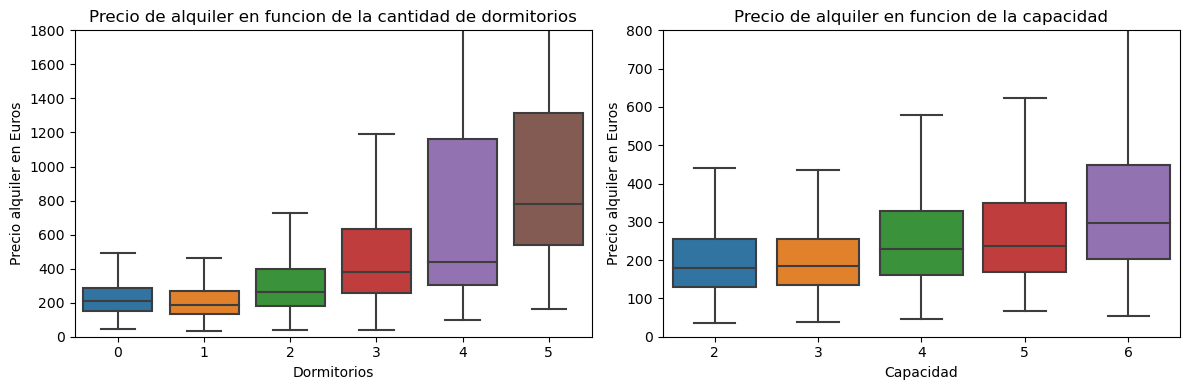

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.boxplot(data=df, y='Price', x='Bedrooms', showfliers=False, ax=ax[0])
ax[0].set(title='Precio de alquiler en funcion de la cantidad de dormitorios', xlabel='Dormitorios',
       ylabel='Precio alquiler en Euros', ylim=(0,1800), xlim=(-0.5,5.5))

sns.boxplot(data=df, y='Price', x='Person_Capacity', showfliers=False, ax=ax[1])
ax[1].set(title='Precio de alquiler en funcion de la capacidad', xlabel='Capacidad',
       ylabel='Precio alquiler en Euros', ylim=(0,800))

plt.tight_layout()
plt.show()

Según los gráficos parece que ambas variables, Bedrooms y Person_Capacity, correlacionan bastante bien con el precio. 

Continuando con los gráficos, haremos lo mismo con Attraction_Index y Restraunt_Index

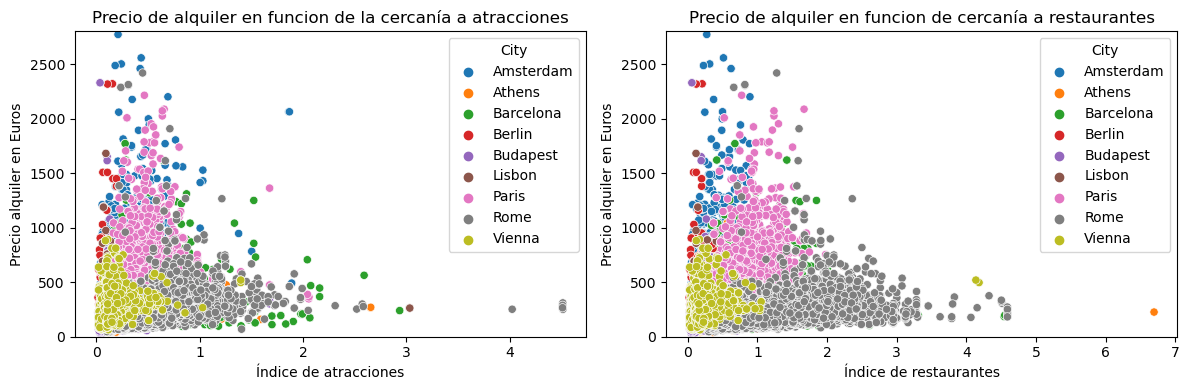

In [4]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.scatterplot(data=df, y='Price', x='Attraction_Index', hue='City',ax=ax[0])
ax[0].set(title='Precio de alquiler en funcion de la cercanía a atracciones', xlabel='Índice de atracciones',
       ylabel='Precio alquiler en Euros', ylim=(0,2800))

sns.scatterplot(data=df, y='Price', x='Restraunt_Index', hue='City', ax=ax[1])
ax[1].set(title='Precio de alquiler en funcion de cercanía a restaurantes', xlabel='Índice de restaurantes',
       ylabel='Precio alquiler en Euros', ylim=(0,2800))

plt.tight_layout()
plt.show()

Según los gráficos anteriores no podemos concluir que haya relación directa en entre las variables Attraction_Index y Restarurant_Index y el precio de alquiler.

Para terminar con los gráficos, analizaremos la variable categórica 'Private_Room' en relación al precio, en un gráfico general para todas las ciudades y en otro discriminado por ciudad.

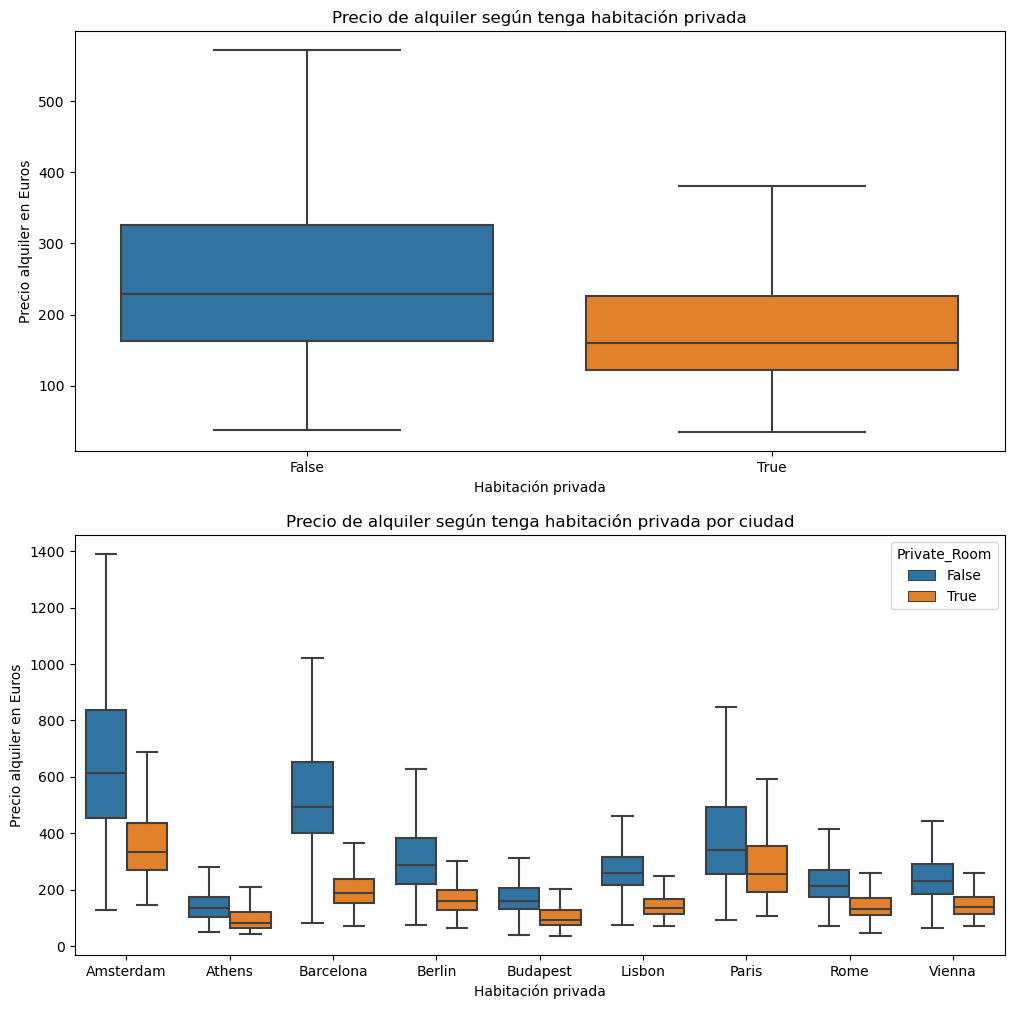

In [5]:
fig, ax = plt.subplots(2,1,figsize=(12,12))

sns.boxplot(data=df, y='Price', x='Private_Room', showfliers=False, ax=ax[0])
ax[0].set(title='Precio de alquiler según tenga habitación privada', xlabel='Habitación privada',
       ylabel='Precio alquiler en Euros')

sns.boxplot(data=df, y='Price', x='City', hue='Private_Room', showfliers=False, ax=ax[1])
ax[1].set(title='Precio de alquiler según tenga habitación privada por ciudad', xlabel='Habitación privada',
       ylabel='Precio alquiler en Euros')

plt.show()

Según los gráficos anteriores, tanto a nivel general, como discrimando por ciudad, los precios son mayores cuando la habitación en alquiler no es privada.

Para avanzar con las conclusiones, usaremos la librería pingouin para calcular los p-values para determinar si las 5 variables independientes están relacionadas con la variable dependiente precio.

In [6]:
import pingouin as pg

print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Person_Capacity'], y=df['Price'])
print('Person Capacity:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Bedrooms'], y=df['Price'])
print('Bedrooms:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Attraction_Index'], y=df['Price'])
print('Attraction Index:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Restraunt_Index'], y=df['Price'])
print('Restraunt Index:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Private_Room'], y=df['Price'])
print('Private_Room:')
print(correlation)
print('-------------------------------------------------------------')

-------------------------------------------------------------
Person Capacity:
             n         r         CI95%          p-val       BF10  power
pearson  41714  0.179969  [0.17, 0.19]  1.295786e-300  9.94e+295    1.0
-------------------------------------------------------------
Bedrooms:
             n         r        CI95%  p-val BF10  power
pearson  41714  0.206687  [0.2, 0.22]    0.0  inf    1.0
-------------------------------------------------------------
Attraction Index:
             n         r         CI95%          p-val        BF10  power
pearson  41714  0.168785  [0.16, 0.18]  3.791096e-264  3.637e+259    1.0
-------------------------------------------------------------
Restraunt Index:
             n         r        CI95%          p-val        BF10  power
pearson  41714  0.113171  [0.1, 0.12]  6.021365e-119  3.467e+114    1.0
-------------------------------------------------------------
Private_Room:
             n         r           CI95%          p-val        BF1

Vemos que en todos los casos el p-val es mucho menor a 0.05 lo que indica que existe una relación y que puede recharzarse la hipótesis nula.
Sin embargo, en todos los casos estudiados, el valor r está más cerca de 0 que de 1, lo que indica que la correlación es débil.

Para poder analizar con más detalle, tomaremos los datos de una única ciudad, ya que pensamos que al analizar todas al ciudades en un único grupo puede afectar nuestro cálculo. Para ello graficaremos cuál es la ciudad que tiene más locales en alquiler y eliminaremos los datos de las demás ciudades.

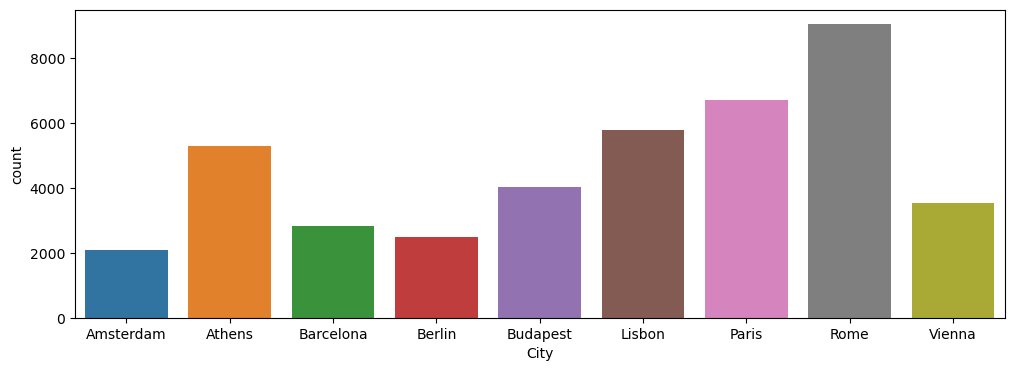

In [7]:
fig, ax = plt.subplots(figsize=(12,4))
ax=sns.countplot(data=df, x='City')
plt.show()

Podemos observar que Roma es la ciudad que tiene más locales en alquier, por lo que desecharemos las demás ciudades y repetiremos los cálculos realizados anteriormente.

In [8]:
df_Rome=df[df['City']=='Rome']

correlation_matrix = df_Rome.corr()
correlation_matrix

/var/folders/6b/nxxkks4j4t5815ftmyvm6xgh0000gn/T/ipykernel_6480/515453813.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_Rome.corr()


,Price,Shared_Room,Private_Room,Person_Capacity,Superhost,Multiple_Rooms,Business,Cleanliness_Rating,Guest_Satisfaction,Bedrooms,City_Center,Metro_Distance,Attraction_Index,Restraunt_Index
Price,1.000000,-0.033424,-0.375700,0.403907,0.034289,-0.065922,0.057399,0.005998,0.036047,0.336617,-0.183018,0.032565,0.402310,0.402695
Shared_Room,-0.033424,1.000000,-0.028723,0.020234,-0.018931,0.002302,0.019278,-0.015707,-0.026638,-0.015250,0.001197,-0.001249,-0.022957,-0.021546
Private_Room,-0.375700,-0.028723,1.000000,-0.585820,-0.065790,0.155870,0.084559,-0.007528,-0.061291,-0.284690,-0.025380,-0.113845,-0.192505,-0.221883
Person_Capacity,0.403907,0.020234,-0.585820,1.000000,0.041342,-0.094933,-0.007686,-0.015427,0.015047,0.597036,0.022446,0.041229,0.117926,0.137293
Superhost,0.034289,-0.018931,-0.065790,0.041342,1.000000,0.085794,-0.161892,0.297224,0.332278,0.030274,0.019724,-0.041143,0.018765,-0.005634
Multiple_Rooms,-0.065922,0.002302,0.155870,-0.094933,0.085794,1.000000,-0.561577,0.042467,0.054421,-0.042833,0.036873,-0.007093,-0.065167,-0.083939
Business,0.057399,0.019278,0.084559,-0.007686,-0.161892,-0.561577,1.000000,-0.129658,-0.184677,-0.059793,-0.205880,-0.044402,0.215445,0.237010
Cleanliness_Rating,0.005998,-0.015707,-0.007528,-0.015427,0.297224,0.042467,-0.129658,1.000000,0.706916,0.004377,0.054256,-0.023341,-0.041657,-0.053069
Guest_Satisfaction,0.036047,-0.026638,-0.061291,0.015047,0.332278,0.054421,-0.184677,0.706916,1.000000,0.029357,0.079619,0.015591,-0.034345,-0.053584
Bedrooms,0.336617,-0.015250,-0.284690,0.597036,0.030274,-0.042833,-0.059793,0.004377,0.029357,1.000000,0.040145,0.011575,0.009074,0.006740


Podemos ver que la matriz de correlación mejoró notablemente los índices entre las variables elegidas 'Person_Capacity', 'Bedrooms', 'Attraction_Index', 'Restraunt_Index' y 'Private_Room' respecto a la variable dependiente 'Price' pasando de 0.1-0.2 a 0.3-0.4

Nuevamente calcularemos los p-valores y r con pingouin, pero esta vez sólo para la ciudad de Roma.

In [9]:
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Person_Capacity'], y=df_Rome['Price'])
print('Person Capacity:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Bedrooms'], y=df_Rome['Price'])
print('Bedrooms:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Attraction_Index'], y=df_Rome['Price'])
print('Attraction Index:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Restraunt_Index'], y=df_Rome['Price'])
print('Restraunt Index:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Private_Room'], y=df_Rome['Price'])
print('Private_Room:')
print(correlation)
print('-------------------------------------------------------------')

-------------------------------------------------------------
Person Capacity:
            n         r         CI95%  p-val BF10  power
pearson  9027  0.403907  [0.39, 0.42]    0.0  inf    1.0
-------------------------------------------------------------
Bedrooms:
            n         r         CI95%          p-val        BF10  power
pearson  9027  0.336617  [0.32, 0.35]  5.181617e-238  5.627e+233    1.0
-------------------------------------------------------------
Attraction Index:
            n        r         CI95%  p-val BF10  power
pearson  9027  0.40231  [0.38, 0.42]    0.0  inf    1.0
-------------------------------------------------------------
Restraunt Index:
            n         r         CI95%  p-val BF10  power
pearson  9027  0.402695  [0.39, 0.42]    0.0  inf    1.0
-------------------------------------------------------------
Private_Room:
            n       r           CI95%          p-val        BF10  power
pearson  9027 -0.3757  [-0.39, -0.36]  1.411633e-300  1.79

Nuevamente vemos que los índices mejoraron notablemente, ya que los p-val se mantienen muy por debajo de 0.05 y además los valores de r mejoraron, pasando de 0.1-0.2 a 0.3-0.4

Por último, crearemos un modelo lineal con la librería statsmodel para los locales de Roma.

In [10]:
import statsmodels.formula.api as sm

model = 'Price ~ Person_Capacity + Bedrooms + Attraction_Index + Restraunt_Index + Private_Room'
lm    = sm.ols(formula = model, data = df_Rome).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     932.5
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:21:43   Log-Likelihood:                -54040.
No. Observations:                9027   AIC:                         1.081e+05
Df Residuals:                    9021   BIC:                         1.081e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               43.3992      4.582      9.471      0.000      34.417      52.381
Private_Room[T.True]   -37.6016      2.625    -14.323      0.000     -42.748     -32.456
Person_Capacity         12.8706      1.149     11.197      0.000      10.617      15.124
Bedrooms                44.2004      2.318     19.066      0.000      39.656      48.745
Attraction_Index        83.5658      5.703     14.654      0.000      72.387      94.744
Restraunt_Index         34.2960      2.792     12.284      0.000      28.823      39.769
==============================================================================
Omnibus:                    13693.035   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10185159.308
Skew:                           9.255   Prob(JB):                         0.00
Kurtosis:                     166.513   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Según el análisis anterior podemos decir a favor del modelo que, para las 5 variables independientes elegidas:
- los valores de P>|t| se encuentran muy por debajo de 0.05
- los coeficientes de relación no incluyen pendiente igual a 0 con el 95% de probabilidad 
- los valores de std err son relativamente bajos (entre un 5% a 10%) respecto a los valores de coef

Sin embargo, debe tenerse en cuenta el r-squared indica que sólo el 34% de la variabilidad es explicada por el modelo.

## CONCLUSIÓN

En función de las consideraciones realizadas anteriormente, podemos concluir para la ciudad de Roma respecto al precio de alquiler:
- el precio base de alquiler en la ciudad de Roma es de 43 euros
- sube 12 euros por cada persona que aumenta su capacidad
- sube 44 euros por cada dormitorio adicional
- sube 84 euros por cada unidad que aumenta el índice de atracciones cercanas
- sube 34 euros por cada unidad que aumenta el índice de restaurantes cercanos
- baja 38 euros si el local cuenta con habitación privada